In [1]:
#!pip install threadpoolctl==3.5.0 # if you encounter threadpoolctl error # https://stackoverflow.com/questions/71352354/sklearn-kmeans-is-not-working-as-i-only-get-nonetype-object-has-no-attribute
# use at least pytorch 2.3.0
import random
from clustering.utils.constants import *
from clustering.utils.utils import *
from clustering.server import Server
np.random.seed(random_seed)
torch.manual_seed(random_seed)
random.seed(random_seed)

In [2]:
tasks_data_info, tasks_data_idx = get_experiment_data()

/Users/alberty/Desktop/18786/FL-cluster-sampling/utility/dataset.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(dataset.targets)


 90%|█████████ | 9/10 [00:10<00:01,  1.17s/it]

Silhouette score: 0.56709623


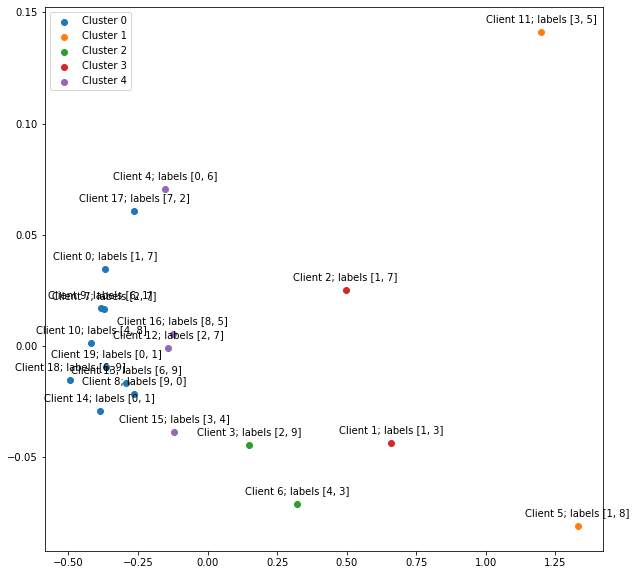

100%|██████████| 10/10 [00:12<00:00,  1.21s/it]


In [3]:
cluster_reqirements = {
    "method": "non_cosine",
    "data_type": "gradient_norms",
    "dim_method": "pca",
    "cluster_method": "kmeans"
}
server_cluster = Server(tasks_data_info, tasks_data_idx, cluster_requirements=(v for _,v in cluster_reqirements.items()))
server_cluster.FL_training(sampling_method='cluster', rounds=10)

 90%|█████████ | 9/10 [00:11<00:01,  1.32s/it]

Silhouette score: 0.5266435


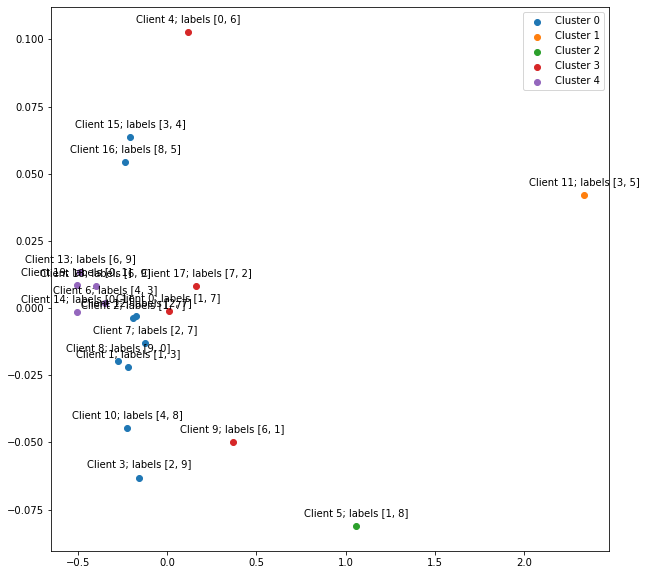

100%|██████████| 10/10 [00:13<00:00,  1.32s/it]


In [4]:
cluster_reqirements = {
    "method": "non_cosine",
    "data_type": "gradient_norms",
    "dim_method": "tsne",
    "cluster_method": "kmeans"
}
server_cluster = Server(tasks_data_info, tasks_data_idx, cluster_requirements=(v for _,v in cluster_reqirements.items()))
server_cluster.FL_training(sampling_method='cluster', rounds=10)

 90%|█████████ | 9/10 [00:11<00:01,  1.25s/it]

Silhouette score: 0.5637339


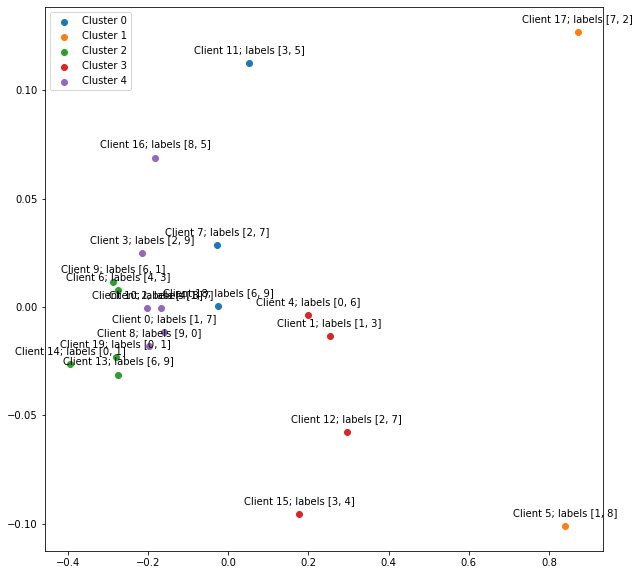

100%|██████████| 10/10 [00:12<00:00,  1.26s/it]


In [5]:
cluster_reqirements = {
    "method": "non_cosine",
    "data_type": "gradient_norms",
    "dim_method": "pca",
    "cluster_method": "gmm"
}
server_cluster = Server(tasks_data_info, tasks_data_idx, cluster_requirements=(v for _,v in cluster_reqirements.items()))
server_cluster.FL_training(sampling_method='cluster', rounds=10)

In [6]:
server_IS = Server(tasks_data_info, tasks_data_idx)
server_IS.FL_training(sampling_method='IS', rounds=150)
server_random = Server(tasks_data_info, tasks_data_idx)
server_random.FL_training(sampling_method='random', rounds=150)
#server_random.plot_loss()

 29%|██▉       | 44/150 [01:04<02:35,  1.47s/it]


KeyboardInterrupt: 